importing all necessary libraries

In [4]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing

pd.set_option('display.max_colwidth', None)


In [5]:
# Load the classifier from the file
with open('../../Training/LGBM/lgbm_model_with_stopwords.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

# load the vectorizer from file
with open('../../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

LGBMClassifier(num_leaves=300)
TfidfVectorizer()


In [6]:
df_test_lgbm_with_stopwords = pd.read_csv('../../../Data-Preparation/sentiment140/testdata_with_stopwords_preprocessed.csv')

In [7]:
# astype(str) is necesarry 
X = loaded_vectorizer.transform(df_test_lgbm_with_stopwords['Text'].astype(str))

In [8]:
# predict the sentiment
df_test_lgbm_with_stopwords['Prediction'] = classifier.predict(X)
df_test_lgbm_with_stopwords.head()

,Text,target,Ground_Truth_Label,Prediction
0,would like to have even a little bit of time off work. Laying out until 11:30 then work 12:30-8:30.,0,negative,0
1,Looking forward to keeping in touch with Naomi.. It has been a long time since we chatted!,4,positive,4
2,"@NBATVAndre No, in Germany the NBA has no airtime . But I got the International LP so I will watch the game for sure.",0,negative,0
3,"@AliChemist Your future self's in trouble, then! My favourite Bagley is probably Running Blind, in Iceland. Terrific.",4,positive,4
4,@remco_dekker did you know there is a reason why Opera is only popular the mobile platform..? It's because Firefox rocks its ass!,4,positive,4


In [10]:
# calculate metrics
accuracy = accuracy_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'])
precision = precision_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)
recall = recall_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)
f1 = f1_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], pos_label=4)

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], beta=beta, pos_label=4)


# visualize metrics
print('LGBM')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

LGBM
Accuracy: 0.79
Precision: 0.79
Recall: 0.80
F1 Score: 0.80
F-beta Score (beta=0.7071067811865475): 0.7935775856753524


In [12]:
print("\nClassification Report:\n")
print(classification_report(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.80      0.78      0.79    160000
    positive       0.79      0.80      0.80    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



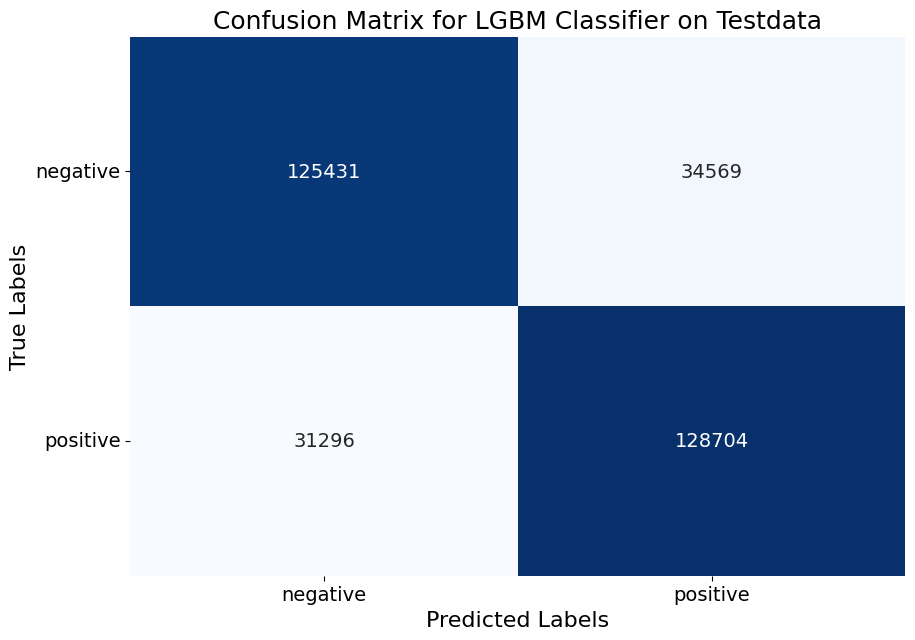

In [13]:
cm_nb = confusion_matrix(df_test_lgbm_with_stopwords['target'], df_test_lgbm_with_stopwords['Prediction'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier on Testdata', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()